In [1]:
import requests
import pandas as pd

def get_content(article_name):
    url = 'https://en.wikipedia.org/w/api.php'
   
    parameters = {
    "action": "query",
    "format": "json",
    "prop": "extracts",
    "titles": article_name,
    "explaintext": True
    }
   
    result = requests.get(url, params=parameters)
   
    return result.json()
record = get_content('ozone layer')
record

{'batchcomplete': '',
 'query': {'normalized': [{'from': 'ozone layer', 'to': 'Ozone layer'}],
  'pages': {'22834': {'pageid': 22834,
    'ns': 0,
    'title': 'Ozone layer',
    'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.\nThe ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out

In [2]:
def merge_contents(value, my_list):
    for k, v in value.items():
        if k == 'extract':
            my_list.append(v)
        else:    
            if isinstance(v, dict):
                merge_contents(v, my_list)
            else:
                pass
listt = []
merge_contents(record, listt)
rts = listt[0]

In [3]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 10.2 MB/s            
     |████████████████████████████████| 78 kB 7.0 MB/s             
     |████████████████████████████████| 759 kB 40.6 MB/s            
     |████████████████████████████████| 309 kB 58.0 MB/s            


In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/docode/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/docode/nltk_data...


True

In [5]:
from nltk.tokenize import word_tokenize
def tokenize(content):
    collection = word_tokenize(content)
    return collection
r = tokenize(rts)  

import re
real_words = []
pattern = re.compile(r'^[a-zA-Z]+$')  # Regex pattern to match only letters
    
for word in r:
    if pattern.match(word):
        real_words.append(word)
            
real_words

['The',
 'ozone',
 'layer',
 'or',
 'ozone',
 'shield',
 'is',
 'a',
 'region',
 'of',
 'Earth',
 'stratosphere',
 'that',
 'absorbs',
 'most',
 'of',
 'the',
 'Sun',
 'ultraviolet',
 'radiation',
 'It',
 'contains',
 'a',
 'high',
 'concentration',
 'of',
 'ozone',
 'in',
 'relation',
 'to',
 'other',
 'parts',
 'of',
 'the',
 'atmosphere',
 'although',
 'still',
 'small',
 'in',
 'relation',
 'to',
 'other',
 'gases',
 'in',
 'the',
 'stratosphere',
 'The',
 'ozone',
 'layer',
 'contains',
 'less',
 'than',
 'parts',
 'per',
 'million',
 'of',
 'ozone',
 'while',
 'the',
 'average',
 'ozone',
 'concentration',
 'in',
 'Earth',
 'atmosphere',
 'as',
 'a',
 'whole',
 'is',
 'about',
 'parts',
 'per',
 'million',
 'The',
 'ozone',
 'layer',
 'is',
 'mainly',
 'found',
 'in',
 'the',
 'lower',
 'portion',
 'of',
 'the',
 'stratosphere',
 'from',
 'approximately',
 'to',
 'kilometers',
 'to',
 'mi',
 'above',
 'Earth',
 'although',
 'its',
 'thickness',
 'varies',
 'seasonally',
 'and',
 

In [6]:
def lower_collection(collection):
    collect = []
    for i in collection: 
        collect.append(i.lower())
    return collect

llist = lower_collection(real_words)
llist

['the',
 'ozone',
 'layer',
 'or',
 'ozone',
 'shield',
 'is',
 'a',
 'region',
 'of',
 'earth',
 'stratosphere',
 'that',
 'absorbs',
 'most',
 'of',
 'the',
 'sun',
 'ultraviolet',
 'radiation',
 'it',
 'contains',
 'a',
 'high',
 'concentration',
 'of',
 'ozone',
 'in',
 'relation',
 'to',
 'other',
 'parts',
 'of',
 'the',
 'atmosphere',
 'although',
 'still',
 'small',
 'in',
 'relation',
 'to',
 'other',
 'gases',
 'in',
 'the',
 'stratosphere',
 'the',
 'ozone',
 'layer',
 'contains',
 'less',
 'than',
 'parts',
 'per',
 'million',
 'of',
 'ozone',
 'while',
 'the',
 'average',
 'ozone',
 'concentration',
 'in',
 'earth',
 'atmosphere',
 'as',
 'a',
 'whole',
 'is',
 'about',
 'parts',
 'per',
 'million',
 'the',
 'ozone',
 'layer',
 'is',
 'mainly',
 'found',
 'in',
 'the',
 'lower',
 'portion',
 'of',
 'the',
 'stratosphere',
 'from',
 'approximately',
 'to',
 'kilometers',
 'to',
 'mi',
 'above',
 'earth',
 'although',
 'its',
 'thickness',
 'varies',
 'seasonally',
 'and',
 

In [7]:
from nltk.probability import FreqDist
def count_frequency(collection):
    fdist = FreqDist(collection)
    dctn = dict(fdist.items())
    return dctn
    


count_frequency(llist)

{'the': 218,
 'ozone': 91,
 'layer': 30,
 'or': 7,
 'shield': 2,
 'is': 39,
 'a': 32,
 'region': 2,
 'of': 114,
 'earth': 14,
 'stratosphere': 12,
 'that': 21,
 'absorbs': 4,
 'most': 6,
 'sun': 5,
 'ultraviolet': 13,
 'radiation': 16,
 'it': 11,
 'contains': 2,
 'high': 5,
 'concentration': 4,
 'in': 72,
 'relation': 2,
 'to': 65,
 'other': 7,
 'parts': 5,
 'atmosphere': 13,
 'although': 5,
 'still': 2,
 'small': 2,
 'gases': 2,
 'less': 4,
 'than': 7,
 'per': 4,
 'million': 4,
 'while': 4,
 'average': 2,
 'as': 13,
 'whole': 1,
 'about': 13,
 'mainly': 2,
 'found': 3,
 'lower': 2,
 'portion': 1,
 'from': 15,
 'approximately': 2,
 'kilometers': 2,
 'mi': 1,
 'above': 4,
 'its': 7,
 'thickness': 3,
 'varies': 3,
 'seasonally': 1,
 'and': 80,
 'geographically': 1,
 'was': 17,
 'discovered': 2,
 'by': 29,
 'french': 1,
 'physicists': 1,
 'charles': 1,
 'fabry': 1,
 'henri': 1,
 'buisson': 1,
 'measurements': 1,
 'showed': 1,
 'sent': 1,
 'out': 6,
 'surface': 10,
 'reaching': 3,
 'ground

In [8]:
def print_most_frequent(frequencies, n):
    sorted_dict = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))
    count = 0
    for key, freq in sorted_dict.items():
        if count == n:
            break
        print(f"{key} : {freq}")
        count += 1

    
    
    

frequencies = count_frequency(llist)

print_most_frequent(frequencies, 10)

the : 218
of : 114
ozone : 91
and : 80
in : 72
to : 65
is : 39
a : 32
layer : 30
by : 29


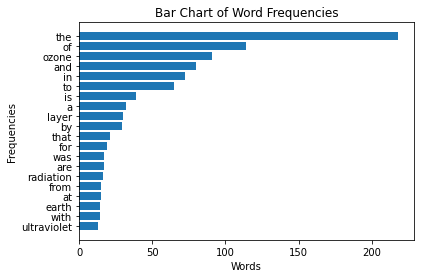

In [9]:
import matplotlib.pyplot as plt 
import numpy as np


sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)[:20]

categories = [item[0] for item in sorted_frequencies]
counts = [item[1] for item in sorted_frequencies]

plt.barh(categories,counts)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Bar Chart of Word Frequencies')
plt.gca().invert_yaxis()

plt.show()

In [10]:
def remove_stop_words(words, stop_words):
    filtered_words = []
    
    for word in words:
        if isinstance(word, str) and word.lower() not in stop_words:
            filtered_words.append(word)
    
    return filtered_words

stop_words = ["the", "how", "while", "over", "have", "an", "million", "still", "other", "simple", "his", "used", "less", "known", "amount", "give", "main", "are", "on", "being", "mainly", "forms", "whole", "these", "first", "above", "only", "would", "between", "while", "all", "based", "three", "because", "small", "free", "before", "into", "out", "near", "reaches", "some", "out", "each", "this", "than", "as", "or", "but", "also", "is", "for", "has", "that", "most", "it", "from", "its", "by", "was", "and", "then", "can", "if", "very", "at", "which", "be", "with", "were", "who", "a", "of", "to", "in", "about"]

filtered_collection = remove_stop_words(llist, stop_words)
filtered_collection

['ozone',
 'layer',
 'ozone',
 'shield',
 'region',
 'earth',
 'stratosphere',
 'absorbs',
 'sun',
 'ultraviolet',
 'radiation',
 'contains',
 'high',
 'concentration',
 'ozone',
 'relation',
 'parts',
 'atmosphere',
 'although',
 'relation',
 'gases',
 'stratosphere',
 'ozone',
 'layer',
 'contains',
 'parts',
 'per',
 'ozone',
 'average',
 'ozone',
 'concentration',
 'earth',
 'atmosphere',
 'parts',
 'per',
 'ozone',
 'layer',
 'found',
 'lower',
 'portion',
 'stratosphere',
 'approximately',
 'kilometers',
 'mi',
 'earth',
 'although',
 'thickness',
 'varies',
 'seasonally',
 'geographically',
 'ozone',
 'layer',
 'discovered',
 'french',
 'physicists',
 'charles',
 'fabry',
 'henri',
 'buisson',
 'measurements',
 'sun',
 'showed',
 'radiation',
 'sent',
 'surface',
 'reaching',
 'ground',
 'earth',
 'usually',
 'consistent',
 'spectrum',
 'black',
 'body',
 'temperature',
 'range',
 'k',
 'except',
 'there',
 'no',
 'radiation',
 'below',
 'wavelength',
 'nm',
 'ultraviolet',
 'en

In [11]:
extracted_values = []
for key in filtered_collection:
    if key in frequencies:
        extracted_values.append(frequencies[key])
    else:
        extracted_values.append(None)    
extracted_values

[91,
 30,
 91,
 2,
 2,
 14,
 12,
 4,
 5,
 13,
 16,
 2,
 5,
 4,
 91,
 2,
 5,
 13,
 5,
 2,
 2,
 12,
 91,
 30,
 2,
 5,
 4,
 91,
 2,
 91,
 4,
 14,
 13,
 5,
 4,
 91,
 30,
 3,
 2,
 1,
 12,
 2,
 2,
 1,
 14,
 5,
 3,
 3,
 1,
 1,
 91,
 30,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 16,
 1,
 10,
 3,
 3,
 14,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 16,
 1,
 4,
 13,
 13,
 1,
 3,
 1,
 2,
 16,
 1,
 2,
 13,
 2,
 3,
 2,
 16,
 1,
 2,
 2,
 91,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 6,
 91,
 3,
 3,
 1,
 3,
 1,
 91,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 4,
 1,
 2,
 91,
 1,
 1,
 1,
 91,
 30,
 4,
 7,
 5,
 13,
 6,
 13,
 13,
 4,
 1,
 2,
 5,
 1,
 3,
 10,
 4,
 2,
 1,
 91,
 30,
 2,
 3,
 1,
 1,
 3,
 7,
 1,
 4,
 10,
 16,
 3,
 91,
 11,
 1,
 3,
 14,
 3,
 4,
 7,
 4,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 1,
 91,
 11,
 2,
 1,
 8,
 6,
 2,
 1,
 1,
 2,
 3,
 2,
 2,
 91,
 30,
 1,
 1,
 91,
 30,
 2,
 2,
 2,
 10,
 2,
 1,
 1,
 2,
 91,
 30,
 2,
 2,
 1,
 1,
 1,
 91,
 14,
 12,
 1,
 13,
 6,
 1,
 1,
 8,
 3,
 2,
 1,
 8,
 2,
 1,
 4,
 2,
 8,
 2,

In [12]:
my_dict = dict(zip(filtered_collection, extracted_values))
my_dict

{'ozone': 91,
 'layer': 30,
 'shield': 2,
 'region': 2,
 'earth': 14,
 'stratosphere': 12,
 'absorbs': 4,
 'sun': 5,
 'ultraviolet': 13,
 'radiation': 16,
 'contains': 2,
 'high': 5,
 'concentration': 4,
 'relation': 2,
 'parts': 5,
 'atmosphere': 13,
 'although': 5,
 'gases': 2,
 'per': 4,
 'average': 2,
 'found': 3,
 'lower': 2,
 'portion': 1,
 'approximately': 2,
 'kilometers': 2,
 'mi': 1,
 'thickness': 3,
 'varies': 3,
 'seasonally': 1,
 'geographically': 1,
 'discovered': 2,
 'french': 1,
 'physicists': 1,
 'charles': 1,
 'fabry': 1,
 'henri': 1,
 'buisson': 1,
 'measurements': 1,
 'showed': 1,
 'sent': 1,
 'surface': 10,
 'reaching': 3,
 'ground': 3,
 'usually': 1,
 'consistent': 1,
 'spectrum': 3,
 'black': 1,
 'body': 1,
 'temperature': 1,
 'range': 2,
 'k': 1,
 'except': 1,
 'there': 3,
 'no': 3,
 'below': 1,
 'wavelength': 4,
 'nm': 13,
 'end': 1,
 'deduced': 1,
 'missing': 2,
 'absorbed': 1,
 'something': 2,
 'eventually': 2,
 'matched': 1,
 'one': 2,
 'chemical': 2,
 'prop

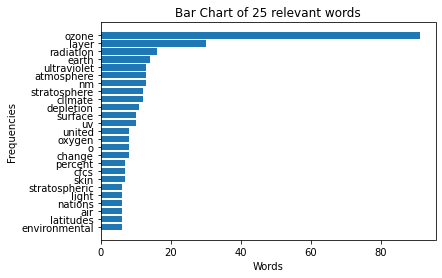

In [13]:
import matplotlib.pyplot as plt 
import numpy as np

clean_dict = sorted(my_dict.items(), key=lambda x: x[1], reverse=True)[:25]

categories = [item[0] for item in clean_dict]
counts = [item[1] for item in clean_dict]

plt.barh(categories,counts)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Bar Chart of 25 relevant words')
plt.gca().invert_yaxis()

plt.show()